<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
- The input layer is the beginning of the flow of a neural network. This is the data that is going to be processed by the subsequent layers. The dimensionality of the data is what determines how many nodes make up the input layer.

### Hidden Layer:
- This is the layer between the input and output layers. The hidden layer takes in the data from the input layer, performs a function on it, then transforms it into outputs.

### Output Layer:
- The output layer is the results of the transformed data. The number of nodes in the output layer is determined by the number of classes in the data.

### Neuron:
- Neurons are the individual units that make up a neural network. A neuron is esseantially a function that takes in data, activates/transforms it, and outputs the data.
![image](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/47_blog_image_2.png)

### Weight:
- A weight determines how much significance an input will have on an output. Each input has a weight value associated with it, representing the strength of the connection.

### Activation Function:
- Also called the transfer function, the activation function determines if the neuron will be activated or not. The purpose of this is to introduce non-linearlity to a model, making it capable of learning and performing more complex tasks.

### Node Map:
- A node map is a visual diagram of a neural network, showing the path from inputs to outputs. 

### Perceptron:
- Perceptron is a single layer of a neural network. It takes each input, multiplies it by the weight, sums the products, and passes it through the activation function.  

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?


![image](https://miro.medium.com/max/1170/1*lk7bbg9gbYKpDYSHABaDOg.png)

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [54]:
# training data

import numpy as np

inputs = np.array([[1,0,0],[1,1,0],[1,0,1],[1,1,1]])
correct_outputs = [[1], [1], [1], [0]]


In [55]:
# sigmoid activation function and derivative

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [56]:
# initialize random weights for inputs

weights = 2 * np.random.random((3,1)) - 1
weights

array([[ 0.22123647],
       [-0.73027631],
       [ 0.1360908 ]])

In [57]:
for iteration in range(1000):
    
    # Weighted sum of inputs/weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate
    activated_outputs = sigmoid(weighted_sum)
    
    # Calculate error
    error = correct_outputs - activated_outputs
    
    # Adjsutments
    adjustments = error * sigmoid_derivative(activated_outputs)
    
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)
    
print("Output after training")
print(activated_outputs)

Weights after training
[[10.87158056]
 [-7.210552  ]
 [-7.21055151]]
Output after training
[[0.99998095]
 [0.97491392]
 [0.97491394]
 [0.02796291]]


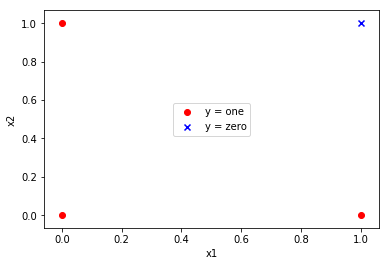

In [46]:
import matplotlib.pyplot as plt

x1 = [0, 1, 0, 1]
x2 = [0, 0, 1, 1]

x = [0, 1, 0]
y = [0, 0, 1]

plt.scatter(x, y, color='red', marker='o', label='y = one')
plt.scatter(1,1, color='blue', marker='x', label='y = zero')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='center')
plt.show()

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [53]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [59]:
y = df["Survived"].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [61]:
X = df[["Age", "Pclass"]].values
X

array([[22.,  3.],
       [38.,  1.],
       [26.,  3.],
       ...,
       [ 7.,  3.],
       [26.,  1.],
       [32.,  3.]])

In [62]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?